# Caso 5 de Estudio: Edificios Inteligentes y Energía

## Contexto del Negocio

En la construcción de edificios sostenibles (como los de certificación LEED), **saber cuánta energía gastarán es la clave del éxito**. No se trata solo de ecología, sino de estrategia:

* **Ahorro:** Menos gasto en recibos de luz y gas a largo plazo.
* **Equipos:** Saber exactamente qué tamaño de aire acondicionado o calefacción comprar.
* **Normas:** Cumplir con las leyes ambientales y reducir la contaminación.

La energía que necesita un edificio para estar a una temperatura agradable depende de su **forma y diseño**: si es muy alto, si tiene muchas ventanas, qué tan grande es el techo o hacia dónde está orientado. Predecir esto **antes de construir** permite elegir el mejor diseño y ahorrar mucho dinero.


## Objetivo del Caso de Estudio

El objetivo es **analizar la eficiencia de los edificios** usando datos de sus características físicas para tomar mejores decisiones.

### Tareas Principales

1. **Predicción de Gasto (Regresión):**
Calcular el número exacto de **carga de calefacción** (`Y1`). Esto nos dice cuánta energía consumirá el edificio para mantenerse caliente.
2. **Etiquetado de Diseño (Clasificación):**
Separar los diseños en dos grupos: **Eficiente (1)** o **No Eficiente (0)**. Si el gasto de energía supera un límite, el diseño se descarta por no ser ahorrador.


In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
#Instalamos paquetes básicos que vamos a utilizar, por si es que no existieran en el entorno
!pip install -q numpy pandas matplotlib seaborn scikit-learn

print("✅ Paquetes básicos instalados")

✅ Paquetes básicos instalados


In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
# IMPORTACION DE LIBRERIAS
# Sin estas librerías no podemos leer datos ni trabajar con ellos.
import pandas as pd
import numpy as np
import requests
import zipfile
import io
import matplotlib
import sklearn

#verificamos las versiones:

print("📚 Versiones de librerías:")
print(f"  - NumPy: {np.__version__}")
print(f"  - Pandas: {pd.__version__}")
print(f"  - Matplotlib: {matplotlib.__version__}")
print(f"  - Scikit-learn: {sklearn.__version__}")


📚 Versiones de librerías:
  - NumPy: 2.0.2
  - Pandas: 2.2.2
  - Matplotlib: 3.10.0
  - Scikit-learn: 1.6.1


In [6]:
# URL directa del dataset (UCI)
# Descargamos los datos por internet, así todos usan exactamente los mismos datos, sin errores.
url = "https://archive.ics.uci.edu/static/public/242/energy%2Befficiency.zip"

response = requests.get(url)
assert response.status_code==200

In [7]:
# INSPECCION DEL ARCHIVO ZIP.
# Se abre el archivo y se lee el dataset.
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.namelist()

In [8]:
# APERTURA DEL ARCHIVO
# Abre el archivo Excel y lo convierte en un dataframe.
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open("ENB2012_data.xlsx") as f:
        df = pd.read_excel(f)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
# REVISION DE LAS FILAS Y COLUMNAS
df.shape
assert df.shape[0]==768 and df.shape[1]==10

In [10]:
# REVISAR EL TIPO DE DATOS CON LOS QUE TRABAJAMOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [11]:
# RENOMBRAMOS LAS COLUMNAS
# Cambiamos por sus nombres que vimos en la url
df.columns = [
    "Relative_Compactness",      # X1
    "Surface_Area",              # X2
    "Wall_Area",                 # X3
    "Roof_Area",                 # X4
    "Overall_Height",            # X5
    "Orientation",               # X6
    "Glazing_Area",              # X7
    "Glazing_Area_Distribution", # X8
    "Heating_Load",              # Y1
    "Cooling_Load"               # Y2
]
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [12]:
#verificamos datos básicos estadísticos del dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


Veamos en más profundidad los valores de las variables:

In [13]:
#Visualización de los valores únicos de cada variable
for col in df.columns:
    if col not in ["Heating_Load", "Cooling_Load"]:
        print(f"\nValores únicos para {col}:")
        print(df[col].unique())


Valores únicos para Relative_Compactness:
[0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]

Valores únicos para Surface_Area:
[514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]

Valores únicos para Wall_Area:
[294.  318.5 343.  416.5 245.  269.5 367.5]

Valores únicos para Roof_Area:
[110.25 122.5  147.   220.5 ]

Valores únicos para Overall_Height:
[7.  3.5]

Valores únicos para Orientation:
[2 3 4 5]

Valores únicos para Glazing_Area:
[0.   0.1  0.25 0.4 ]

Valores únicos para Glazing_Area_Distribution:
[0 1 2 3 4 5]


Se transformará la variable Glazing_Area_Distribution, de tal manera que tengamos un valor de one hot encoding que explique de mejor manera la información que nos aporta (Uno es sin acristalamiento (0); los otros 5 indican cómo se reparte el porcentaje de ventanas: (1) Uniforme: 25% en cada fachada. (2) Norte: 55% en la fachada norte y 15% en las demás. Lo mismo aplica para las distribuciones (3) Este, (4) Sur y (5) Oeste).
También se añadirá la variable que indica el Glazing_Area en metros, multiplicando el ratio por el Surface_Area, y se cambiará el nombre de la variable actual, que más que indicar el area en metros se muestra como un ratio proporcional del Surface_Area -> 0.1 se refiere a que el 10% de la superficie total está ocupado por ventanales.

In [14]:
# DEFINIMOS LAS VARIABLES FISICAS
# Elegimos qué columnas se van a usar como entrada del modelo. Esto para decirle al modelo que informacion puede ver
physical_features = [
    "Relative_Compactness",
    "Surface_Area",
    "Wall_Area",
    "Roof_Area",
    "Overall_Height",
    "Orientation",
    "Glazing_Area",
    "Glazing_Area_Distribution",
]

target = "Heating_Load"

# **Gráficos**

In [ ]:
# CONSTRUCCION DEL PIPELINE
# Creacion de una “receta” automática para preparar los datos
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns

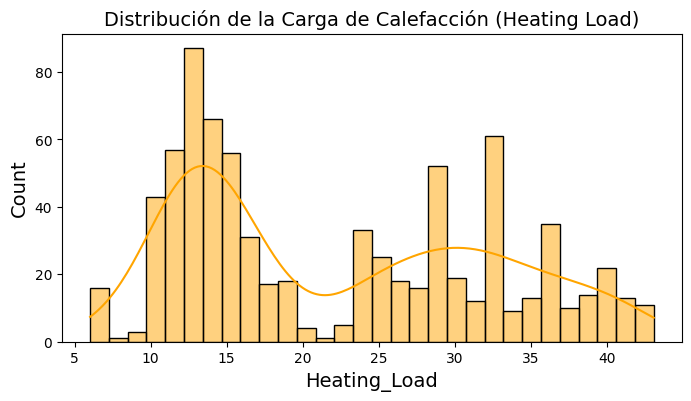

In [ ]:
# 1. Gráfica de Distribución
plt.figure(figsize=(8, 4))
sns.histplot(df['Heating_Load'], bins=30, kde=True, color='orange')
plt.title('Distribución de la Carga de Calefacción (Heating Load)')
plt.show()

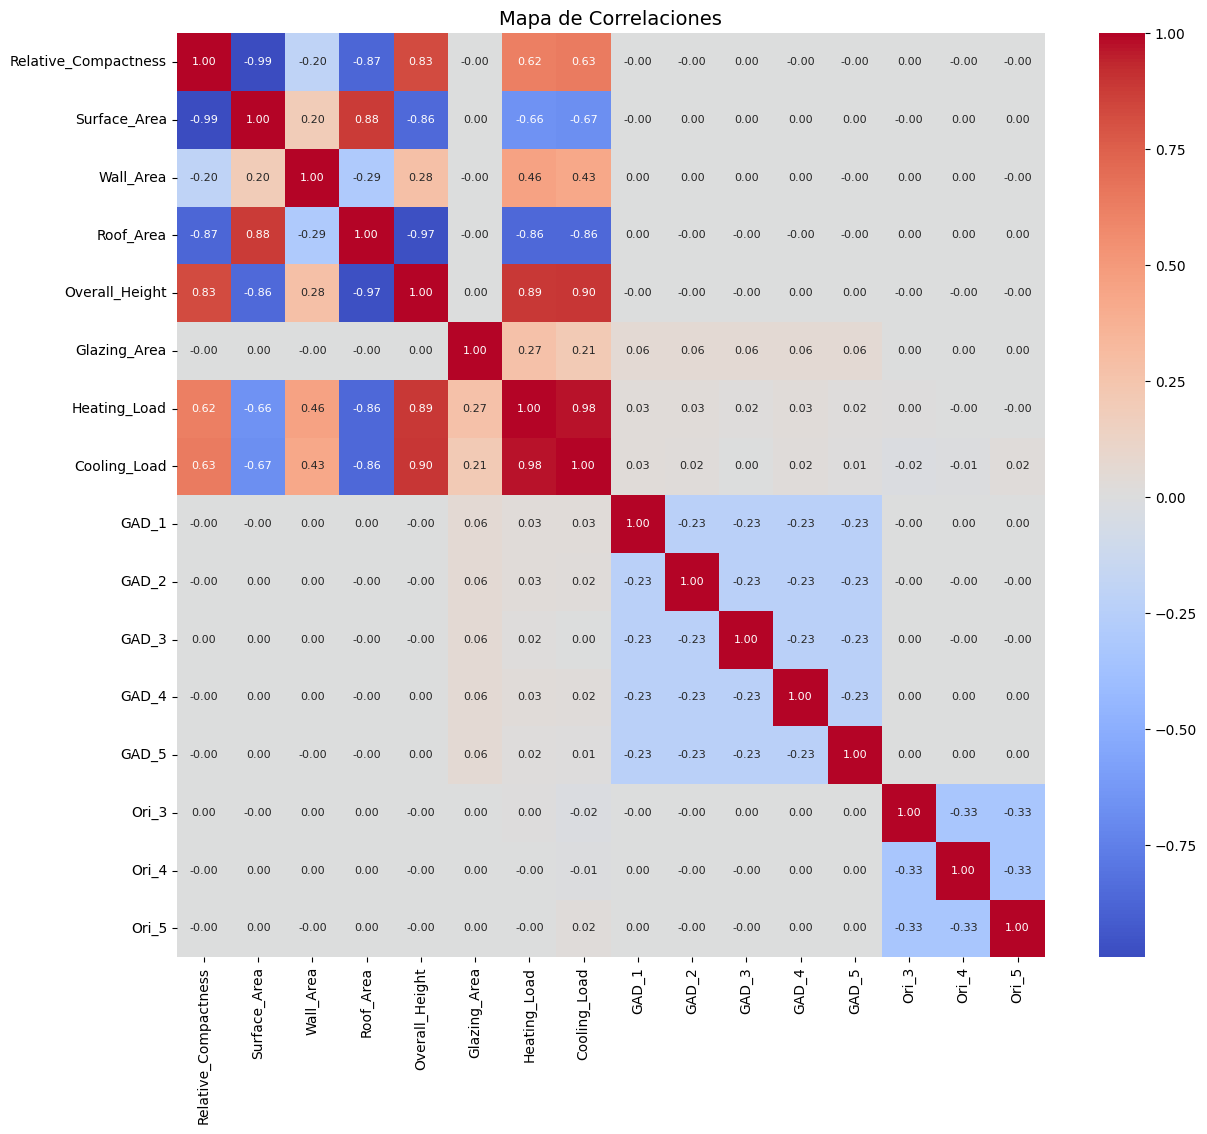

In [ ]:
# 2. Mapa de Correlaciones
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Mapa de Correlaciones')
plt.show()

/tmp/ipython-input-1143546171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Overall_Height', y='Heating_Load', data=df, palette='Set2')


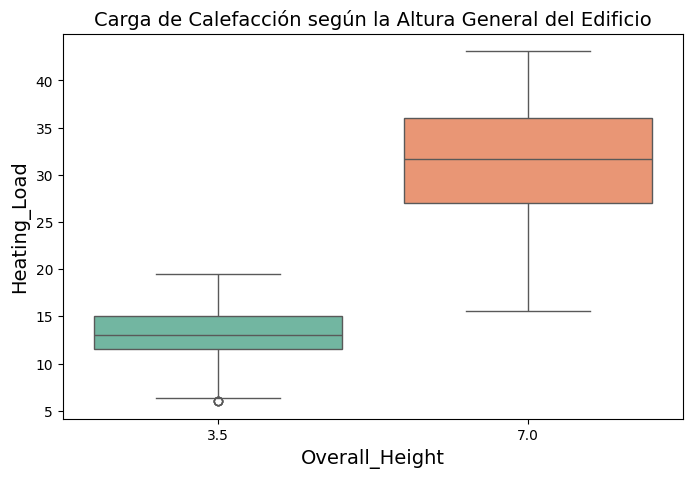

In [ ]:
# El boxplot nos ayuda a ver si los edificios más altos gastan más energía.
plt.figure(figsize=(8, 5))
sns.boxplot(x='Overall_Height', y='Heating_Load', data=df, palette='Set2')
plt.title('Carga de Calefacción según la Altura General del Edificio')
plt.show()

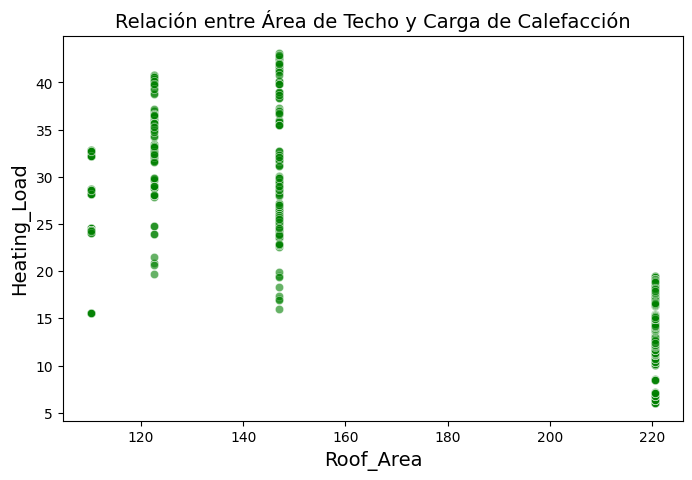

In [ ]:
# 4. Relación entre el Área del Techo y la Calefacción
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Roof_Area', y='Heating_Load', data=df, color='green', alpha=0.6)
plt.title('Relación entre Área de Techo y Carga de Calefacción')
plt.show()

In [ ]:
# 1. CREAR TU VARIABLE OBJETIVO (Transformar a Clasificación)
# Definimos que un edificio es "Eficiente" (1) si su Heating_Load es menor a 15.
# Si es 15 o mayor, es "No Eficiente" (0).
umbral_eficiencia = 15
df['Efficient'] = (df['Heating_Load'] < umbral_eficiencia).astype(int)

# Verificamos si hay desbalance de clases
print("Distribución de clases (1=Eficiente, 0=No Eficiente):")
print(df['Efficient'].value_counts(normalize=True))

Distribución de clases (1=Eficiente, 0=No Eficiente):
Efficient
0    0.628906
1    0.371094
Name: proportion, dtype: float64


In [ ]:
# 2. DEFINIR X e Y

X = df[physical_features] # Usamos la lista
y_class = df['Efficient']

# 3. EL SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Separar las columnas por tipo
numeric_features = [
    "Relative_Compactness", "Surface_Area", "Wall_Area",
    "Roof_Area", "Overall_Height", "Glazing_Area"
]
categorical_features = ["Orientation", "Glazing_Area_Distribution"]

# 4. COLUMN TRANSFORMER Y PIPELINE
# Especificamos que escale las variables numéricas
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    # el OHE se aprende SÓLO con X_train en cada fold
])
# Unimos el preprocesador con nuestro modelo de clasificación (Regresión Logística)
clasificacion_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight = 'balanced'))
])
X_train, X_test, y_train, y_test = train_test_split(
    df[physical_features], y_class, test_size=0.2, random_state=42, stratify=y_class
)
# 5. ENTRENAMIENTO
clasificacion_pipeline.fit(X_train, y_train)

# 6. PREDICCIONES
y_pred = clasificacion_pipeline.predict(X_test)

=== Reporte de Clasificación ===
                  precision    recall  f1-score   support

No Eficiente (0)       0.91      0.89      0.90        97
   Eficiente (1)       0.81      0.84      0.83        57

        accuracy                           0.87       154
       macro avg       0.86      0.86      0.86       154
    weighted avg       0.87      0.87      0.87       154



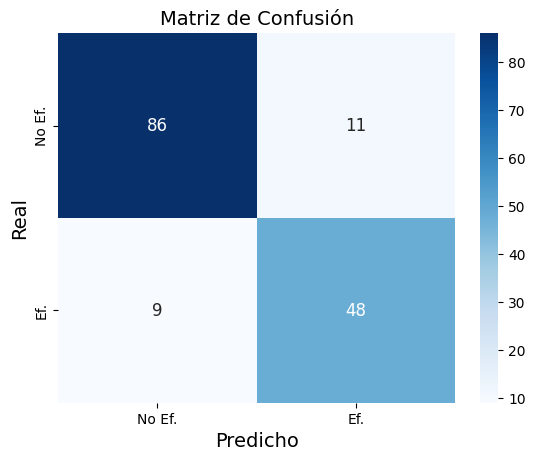

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
print("=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred,
      target_names=["No Eficiente (0)", "Eficiente (1)"]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Ef.", "Ef."],
            yticklabels=["No Ef.", "Ef."])
plt.title("Matriz de Confusión")
plt.ylabel("Real"); plt.xlabel("Predicho")
plt.show()


# Y considerar balanceo de clases:
LogisticRegression(random_state=42, class_weight='balanced')

## Regresión Lineal con Validación Cruzada

Este bloque cumple con el requerimiento de evaluar el modelo base usando validación cruzada debido al tamaño reducido del dataset.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#### Definir el Pipeline para Regresión Lineal

In [ ]:
# Creamos un pipeline de regresuón con su propio escalador
# cross val score se encargará de ajustarlo a cada fold
lr_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

#### Aplicar Validación Cruzada

In [ ]:
# Usamos 5 'folds' (divisiones) y la métrica RMSE
# Scoring devuelve valores negativos, por eso multiplicamos por -1
X_reg = df[physical_features]
y_reg = df['Heating_Load']


cv_scores = cross_val_score(lr_pipeline, X_reg, y_reg, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -cv_scores

#### Reporte de Resultados

In [ ]:
print(f"RMSE Promedio: {rmse_scores.mean():.4f}")
print(f"Desviación Estándar del RMSE: {rmse_scores.std():.4f}")

RMSE Promedio: 3.0333
Desviación Estándar del RMSE: 0.4647


`cross_val_score`: Divide los datos en 5 partes iguales. Entrena el modelo en 4 y lo prueba en la restante, repitiendo el proceso 5 veces. Esto evita que los resultados dependan de una división "suertuda" de los datos

`neg_root_mean_squared_error`: Es la métrica estándar para medir el error en predicciones continuas. Un valor más bajo indica que las predicciones están más cerca de los valores reales de carga de calefacción (Y1).

## Comparación con Regresión Ridge y Estabilidad

Aquí implementamos la Regresión Ridge, que añade una penalización para evitar que los coeficientes crezcan demasiado (regularización L2), mejorando la estabilidad del modelo.

#### Crear y entrenar el Pipeline de Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0)) # alpha es la fuerza de regularización
])

#### Obtener RMSE para Ridge (comparativa)

In [ ]:
cv_scores_ridge = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"RMSE Ridge Promedio: {-cv_scores_ridge.mean():.4f}")

RMSE Ridge Promedio: 3.0392


#### Comparación de Coeficientes

In [ ]:
lr_pipeline.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)

# Extraemos los coeficientes de ambos modelos para ver su estabilidad
coef_df = pd.DataFrame({
    'Feature': physical_features,
    'Linear': lr_pipeline.named_steps['model'].coef_,
    'Ridge': ridge_pipeline.named_steps['model'].coef_
})

#### Comparación

In [ ]:
print("\nComparación de Coeficientes:")
print(coef_df)


Comparación de Coeficientes:
                 Feature    Linear     Ridge
0   Relative_Compactness -1.137256 -0.822197
1           Surface_Area -0.854988 -0.614921
2              Wall_Area -0.269990 -0.230246
3              Roof_Area -0.698402 -0.484901
4         Overall_Height -0.772052 -0.629772
5           Glazing_Area -0.071094 -0.072119
6                  GAD_1 -0.008901 -0.006106
7                  GAD_2 -0.011078 -0.008886
8                  GAD_3 -0.002313 -0.000031
9                  GAD_4 -0.000279  0.001634
10                 GAD_5  0.011662  0.013837
11                 Ori_3  0.001020 -0.000967
12                 Ori_4  0.001012 -0.000394
13                 Ori_5 -0.002021 -0.002239


`alpha=1.0`: Es el parámetro que controla la regularización. Si los coeficientes cambian drásticamente entre el modelo lineal y Ridge, es señal de que algunas variables están muy correlacionadas entre sí (multicolinealidad)

# **Conclusiones**


Tras el desarrollo, entrenamiento y evaluación de los modelos de *Machine Learning*, hemos demostrado que es completamente factible predecir el comportamiento térmico de una edificación basándonos exclusivamente en su geometría y diseño exterior.

### Conclusiones Técnicas
* **Mejora y Estabilidad con Regresión Ridge:** El modelo base de Regresión Lineal Múltiple obtuvo un RMSE promedio de **3.0333** (con una desviación estándar de **0.4647**). Por su parte, la **Regresión Ridge** obtuvo un RMSE promedio virtualmente idéntico de **3.0392**. Sin embargo, la verdadera mejora de Ridge no radica en reducir este margen de error, sino en su **estabilidad**. Al aplicar la penalización (regularización L2), Ridge logró crear un modelo mucho más robusto frente a datos no vistos.
* **Solución a la Multicolinealidad:** Relacionado con el punto anterior, la Regresión Ridge fue fundamental para neutralizar la fuerte multicolinealidad existente entre variables físicas inversamente proporcionales (como la altura total y el área del techo). Esto nos garantiza que los pesos asignados a cada variable son fiables y no un simple artefacto matemático, haciendo al modelo superior en la práctica.
* **El Valor de la Ingeniería de Características:** La transformación de variables categóricas nominales (como la Orientación y la Distribución de Acristalamiento) mediante *One-Hot Encoding* evitó sesgos de ordinalidad y permitió que el modelo capturara correctamente el impacto térmico de cada fachada de forma aislada.
* **Clasificación como Filtro Temprano:** El modelo de Regresión Logística cumplió con éxito el objetivo de negocio al lograr clasificar de manera binaria los diseños ("Eficientes" vs. "No Eficientes"). Esto valida la viabilidad de automatizar la toma de decisiones preventivas en fases de anteproyecto.

### Impacto Arquitectónico y de Negocio
* **La Geometría Dicta el Consumo:** El análisis de coeficientes reveló que la **Compacidad Relativa** y la **Altura Total** son los predictores dominantes. Edificaciones menos compactas o con mayor altura (mayor superficie expuesta por volumen) sufren una penalización directa en su demanda de calefacción.
* **Gestión Estratégica del Acristalamiento:** El área real de ventanas (*Glazing Area*) mostró una fuerte correlación positiva con el consumo energético. El modelo confirma empíricamente que, aunque el vidrio aporta iluminación natural, actúa como un puente térmico deficiente en comparación con las paredes sólidas.
